# Chapter 12 in-chapter exercises

In [1]:
# import libraries and define global settings
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# import module from scipy (for cosine similarity)
from scipy import spatial


In [2]:
# define global figure properties
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })

### Fig 12.1: Example of scatter plot showing correlated data

In [3]:
# number of sibling pairs
num_pairs = 40

# simulate ratings for brothers
brothers_ratings = np.random.randint(1,11,num_pairs)

# simulate correlated ratings for sisters based on brothers' ratings
noise = np.random.normal(0,2,num_pairs)  # random noise
sisters_ratings = brothers_ratings + noise  # sister's ratings are brother's ratings plus some noise

# make sure ratings are within bounds 1 and 10
sisters_ratings = np.clip(np.round(sisters_ratings),1,10)

# correlation
r = stats.pearsonr(brothers_ratings,sisters_ratings)[0]

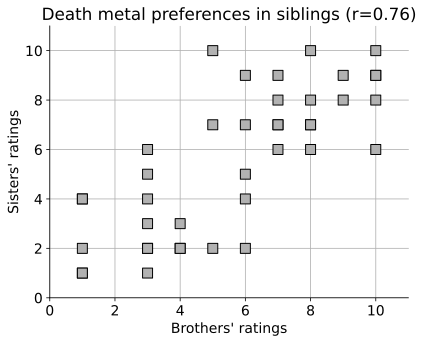

In [4]:
# scatter plot
plt.figure(figsize=(6,5))
plt.plot(brothers_ratings, sisters_ratings,'ks',markersize=10,markerfacecolor=(.7,.7,.7))
plt.title(f'Death metal preferences in siblings (r={r:.2f})',loc='center')
plt.xlabel("Brothers' ratings")
plt.ylabel("Sisters' ratings")
plt.xlim(0,11)
plt.ylim(0,11)
plt.grid(True)

plt.tight_layout()
plt.show()

### Fig 12.2: Different correlation coefficients

In [5]:
# correlation values
rs = [ 1,.7,.2,0,0,0,-.2,-.7,-1 ]

# sample size
N = 188

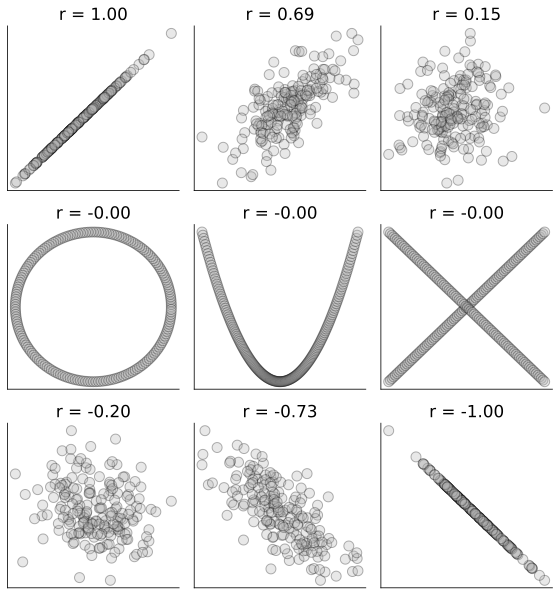

In [6]:
# plot
_,axs = plt.subplots(3,3,figsize=(8,8.5))

for r,ax,i in zip(rs,axs.flatten(),range(9)):

  # generate data
  x = np.random.randn(N)
  y = x*r + np.random.randn(N)*np.sqrt(1-r**2)

  # exceptions for r=0
  if i==3:
    x = np.cos(np.linspace(0,2*np.pi-2*np.pi/N,N))
    y = np.sin(np.linspace(0,2*np.pi-2*np.pi/N,N))
  elif i==4:
    x = np.linspace(-2,2,N)
    y = x**2
  elif i==5:
    x = np.linspace(-2,2,N//2)
    y = np.concatenate((x,-x),0)
    x = np.concatenate((x,x),0)

  # empirical correlation
  rho = np.corrcoef(x,y)[0,1]

  # plot
  ax.plot(x,y,'ko',markersize=10,markerfacecolor=(.7,.7,.7),alpha=.3)
  ax.set(xticks=[],yticks=[])
  ax.set_title(f'r = {rho:.2f}',loc='center')


plt.tight_layout()
plt.show()

### Fig 12.3: Same correlation, different slopes

In [7]:
N = 100

# Dataset 1
x1 = np.random.normal(100,10,N)
y1 = .3*x1 + np.random.randn(N)*3
slope1,intercept1,r1,_,_ = stats.linregress(x1,y1)

# Dataset 2
x2 = np.random.normal(10,1,N) + np.mean(x1)
y2 = 3*x2 + np.random.randn(N)*3
slope2,intercept2,r2,_,_ = stats.linregress(x2,y2)

# x-axis limits
xmin,xmax = np.min(x1)-5,np.max(x1)+5



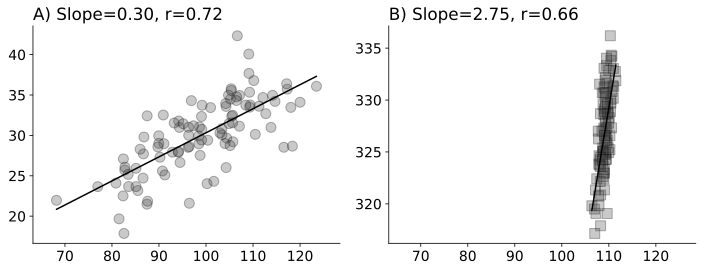

In [8]:
# Plot datasets and their regression lines
_,axs = plt.subplots(1,2,figsize=(10,4))

axs[0].plot(x1,y1,'ko',markersize=10,markerfacecolor=(.3,.3,.3),alpha=.3)
axs[0].plot(x1,intercept1 + slope1*x1,'k')
axs[0].set_title(fr'A) Slope={slope1:.2f}, r={r1:.2f}')
axs[0].set(xlim=[xmin,xmax])

axs[1].plot(x2,y2,'ks',markersize=10,markerfacecolor=(.3,.3,.3),alpha=.3)
axs[1].plot(x2, intercept2 + slope2*x2,'k')
axs[1].set_title(fr'B) Slope={slope2:.2f}, r={r2:.2f}')
axs[1].set(xlim=[xmin,xmax])

plt.tight_layout()
plt.show()